### Animations

Time evultions can be illustrated with an animation by using `matplotlib.animation.FuncAnimation`. 

Note: An interactive plot must be enabled.

In [1]:
# enable interactive plot
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt   
import matplotlib.animation as animation

In [49]:
class HeatTransferWall:
    def __init__(self, thickness, T_inside, T_outside, alpha = 19, N = 100):

        self.alpha = alpha
        self.number_elements = N
        self.dx = thickness / N
        self.elapsed_time = 0.0

        # initializing the state variable u(x)
        self.x = np.linspace(0, thickness, N)
        self.u = np.ones(N) * T_outside
        self.u[0] = T_inside
        
    def step(self, dt = 0.1, nsteps = 1):

        N = self.number_elements
        
        d2u_dx2 = np.empty(N)
        
        for i in range(nsteps):
            # spatial second derivative by numerical differentiation
            d2u_dx2[1:N-1] = (self.u[2:N] - 2* self.u[1:N-1] + self.u[0:N-2]) / self.dx**2

            # Euler step in time
            self.u[1:N-1] = self.u[1:N-1] + self.alpha * d2u_dx2[1:N-1] * dt
            
        self.elapsed_time = self.elapsed_time + dt * nsteps

Initialize the figure plot.

In [50]:
def plot_setup():

    fig = plt.figure(figsize = (8,4)) 
    
    line, = plt.plot([], [], lw = 2)   # define the line object 
    time_text = plt.text(130, 19, '')  # define the text object

    plt.setp(plt.gca(), xlim = (0, 200), ylim = (-1, 21))
    
    plt.grid('on')
    plt.ylabel(r'Temperature ($^\circ$C)')
    plt.xlabel('Wall position (mm)')
    
    return fig, line, time_text

The key to using the animation functionality is to write a function `update` that updates the line and text objects that change during the course of the animation.

In [64]:
def plot_update(frame_number, wall, line, time_text):
        
    wall.step(dt = 0.1, nsteps = 10) # time propagate the state with the Euler method

    time_text.set_text(f'Time: {wall.elapsed_time:.1f} (sec)') # update the text object
    line.set_data(wall.x, wall.u)                              # update the line object

Define a wall with thickness (in mm) and inner and outer temperatures (in degrees Celsius).

In [75]:
# create a wall object
wall = HeatTransferWall(200, 20, 0)

Run the animation.

<IPython.core.display.Javascript object>


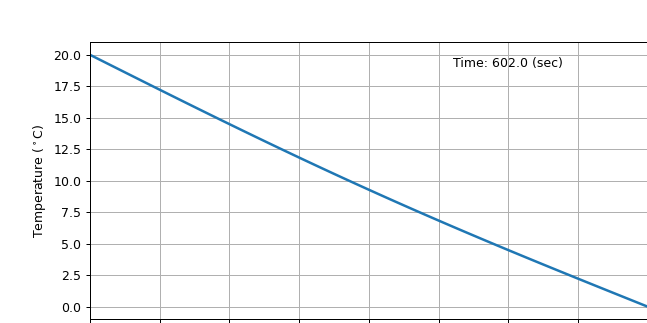

In [76]:
# initialize the plot
fig, line, time_text = plot_setup()

# run the animation
anim = animation.FuncAnimation(fig, plot_update, fargs = [wall, line, time_text], 
                               frames = 300, interval = 100, repeat = False)

anim.save('wall.gif', dpi = 80, writer = 'pillow')

plt.show()

In [62]:
help(animation.FuncAnimation)

Help on class FuncAnimation in module matplotlib.animation:

class FuncAnimation(TimedAnimation)
 |  FuncAnimation(fig, func, frames=None, init_func=None, fargs=None, save_count=None, *, cache_frame_data=True, **kwargs)
 |  
 |  Makes an animation by repeatedly calling a function *func*.
 |  
 |  Parameters
 |  ----------
 |  fig : `~matplotlib.figure.Figure`
 |      The figure object used to get needed events, such as draw or resize.
 |  
 |  func : callable
 |      The function to call at each frame.  The first argument will
 |      be the next value in *frames*.   Any additional positional
 |      arguments can be supplied via the *fargs* parameter.
 |  
 |      The required signature is::
 |  
 |          def func(frame, *fargs) -> iterable_of_artists
 |  
 |      If ``blit == True``, *func* must return an iterable of all artists
 |      that were modified or created. This information is used by the blitting
 |      algorithm to determine which parts of the figure have to be update